# Курсовая работа. Блок ML Beginner
<br>

**NB!** Код должен быть с комментариями к каждому логическому блоку кода. В противном случае работа **не** будет принята. <br><br>
Выполнение курсовой работы может потребовать использование дополнительных библиотек. Может потребоваться предварительная обработка данных.

<br><br>
**Описание работы:**
&nbsp;&nbsp;&nbsp;&nbsp;
<br><br>
&nbsp;&nbsp;&nbsp;&nbsp; Любой бизнес хочет максимизировать количество клиентов. Для достижения этой цели важно не только пытаться привлечь новых, но и удерживать уже существующих. Удержать клиента обойдется компании дешевле, чем привлечь нового. Кроме того, новый клиент может оказаться слабо заинтересованным в услугах бизнеса и с ним будет сложно работать, тогда как о старых клиентах уже есть необходимые данные по взаимодействию с сервисом. 
 <br>

&nbsp;&nbsp;&nbsp;&nbsp; Соответственно, прогнозируя отток, мы можем вовремя среагировать и попытаться удержать клиента, который хочет уйти. Опираясь на данные об услугах, которыми пользуется клиент, мы можем сделать ему специальное предложение, пытаясь изменить его решение об уходе от оператора. Благодаря этому задача удержания будет легче в реализации, чем задача привлечения новых пользователей, о которых мы еще ничего не знаем.<br>

&nbsp;&nbsp;&nbsp;&nbsp; Вам предоставлен набор данных от телекоммуникационной компании. В данных содержится информация о почти шести тысячах пользователей, их демографических характеристиках, услугах, которыми они пользуются, длительности пользования услугами оператора, методе оплаты, размере оплаты. 
<br>

&nbsp;&nbsp;&nbsp;&nbsp; Cтоит задача проанализировать данные и спрогнозировать отток пользователей (выявить людей, которые продлят контракт и которые не продлят). Работа должна включать в себя следующие обязательные пункты: 
1. Описание данных *(с расчетом базовых статистик)*, 
2. Исследование зависимостей и формулирование гипотез, 
3. Построение моделей для прогнозирования оттока *(с обоснованием выбора той или иной модели)* на основе проверенных гипотез и выявленных взаимосвязей, 
4. Сравнение качества полученных моделей. 

Во втором разделе обязательно должно присутствовать обоснование гипотез, подробное описание выявленных взаимосвязей, а также их визуализация. 
<br>В четвертом дополнительно должны быть сформулированы общие выводы работы.

<br><br>

_________

[Codebook](#Codebook) <br>
[1. Описание данных](#1.-Описание-данных)<br>
[2. Исследование зависимостей и формулирование гипотез](#2.-Исследование-зависимостей-и-формулирование-гипотез)<br>
[3. Построение моделей для прогнозирования оттока](#3.-Построение-моделей-для-прогнозирования-оттока)<br>
[4. Сравнение качества моделей](#4.-Сравнение-качества-моделей) <br>


## Codebook
<br>

[Ссылка для скачивания данных](https://drive.google.com/open?id=1dPCG76ST6NohYKtVMGv6HpFL-jD5p1eJ) 
<br><br>

`telecom_users.csv` содержит следующие значения:<br><br>

&nbsp;&nbsp;&nbsp;&nbsp; `customerID` – id клиента<br>
&nbsp;&nbsp;&nbsp;&nbsp; `gender` – пол клиента (male/female)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `SeniorCitizen` – яляется ли клиент пенсионером (1, 0)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Partner` – состоит ли клиент в браке (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Dependents` – есть ли у клиента иждивенцы (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `tenure` – сколько месяцев человек являлся клиентом компании<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PhoneService` – подключена ли услуга телефонной связи (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MultipleLines` – подключены ли несколько телефонных линий (Yes, No, No phone service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `InternetService` – интернет-провайдер клиента (DSL, Fiber optic, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineSecurity` – подключена ли услуга онлайн-безопасности (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `OnlineBackup` – подключена ли услуга online backup (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `DeviceProtection` – есть ли у клиента страховка оборудования (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TechSupport` – подключена ли услуга технической поддержки (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingTV` – подключена ли услуга стримингового телевидения (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `StreamingMovies` – подключена ли услуга стримингового кинотеатра (Yes, No, No internet service)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Contract` – тип контракта клиента (Month-to-month, One year, Two year)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaperlessBilling` – пользуется ли клиент безбумажным биллингом (Yes, No)<br>
&nbsp;&nbsp;&nbsp;&nbsp; `PaymentMethod` – метод оплаты (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))<br>
&nbsp;&nbsp;&nbsp;&nbsp; `MonthlyCharges` – месячный размер оплаты на настоящий момент<br>
&nbsp;&nbsp;&nbsp;&nbsp; `TotalCharges` – общая сумма, которую клиент заплатил за услуги за все время<br>
&nbsp;&nbsp;&nbsp;&nbsp; `Churn` – произошел ли отток (Yes or No)<br>

# 1. Описание данных
Считываем датасет в переменную dat:

In [2]:
!pip install squarify
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import Normalize
import squarify
import warnings
warnings.filterwarnings('ignore')
dat = pd.read_csv("telecom_users.csv")
dat.drop("Unnamed: 0", inplace = True, axis = 1, errors = 'ignore') #Удаляем не несущий полезной информации столбец "Unnamed: 0"
dat.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,No,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,Yes,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


Выведем информацию о полученном датафрейме:

In [2]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
customerID          5986 non-null object
gender              5986 non-null object
SeniorCitizen       5986 non-null int64
Partner             5986 non-null object
Dependents          5986 non-null object
tenure              5986 non-null int64
PhoneService        5986 non-null object
MultipleLines       5986 non-null object
InternetService     5986 non-null object
OnlineSecurity      5986 non-null object
OnlineBackup        5986 non-null object
DeviceProtection    5986 non-null object
TechSupport         5986 non-null object
StreamingTV         5986 non-null object
StreamingMovies     5986 non-null object
Contract            5986 non-null object
PaperlessBilling    5986 non-null object
PaymentMethod       5986 non-null object
MonthlyCharges      5986 non-null float64
TotalCharges        5986 non-null object
Churn               5986 non-null object
dtypes: float64(1), int64(2), obj

В датафрейме нет пропущенных (NaN) значений. Однако, поле TotalCharges имеет тип object. Прямое приведение его к типу float вызывает ошибку, поскольку в нем есть часть некорректных строковых данных. Преобразуем поле TotalCharges к числовому виду, заменив некорректные значения медианным значением общей суммы. Теперь датафрейм готов к дальнейшей статистической обработке.

In [3]:
dat.TotalCharges = pd.to_numeric(dat.TotalCharges, errors = 'coerce')
dat.TotalCharges.fillna(value =  dat.TotalCharges.agg(np.median), inplace = True) #После преобразования к numeric некорректные строковые значения заменяются NaN-ами,
#заменяем NaN на медианы

**Сначала посмотрим на общую информацию о клиентах:**

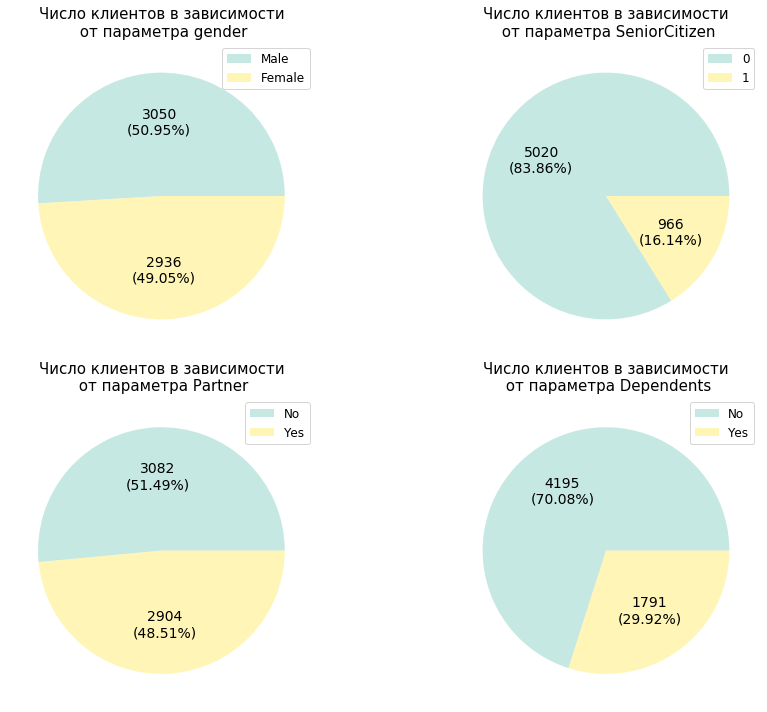

In [4]:
df_desc = dat.iloc[:, 1:5]
colors = cm.get_cmap('Set3', 2).colors
fig, ax = plt.subplots(2,2, figsize = (14, 10))
for i, col_name in enumerate(df_desc.columns):
    axc = ax[i//2, i%2]
    dfc = df_desc[col_name].value_counts()
    axc.pie(dfc, colors = colors, \
            radius = 1, labels = dfc.index, labeldistance = None, textprops = {'size':14},\
            autopct = lambda x: f'{int(np.round(x*dfc.sum()/100))}\n({np.round(x, 2)}%)', wedgeprops = {'alpha':0.5})
    axc.legend(fontsize = 12, loc = 'best')
    axc.set_title(f"Число клиентов в зависимости\n от параметра {col_name}", fontsize =15)
plt.tight_layout()
plt.show()

Из приведенных выше круговых диаграмм видно, что основную часть клиентов компании составляют непенсионеры без иждивенцев. Примерно поровну среди клиентов мужчин и женщин.Также примерно поровну состоящих в браке людей и холостых.

**Сделаем обзор общей статистики услуг телефонии:**

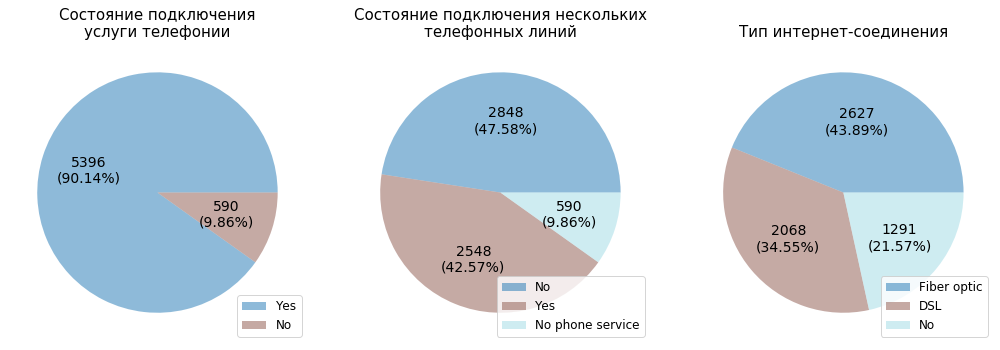

In [5]:
df_phone = dat.iloc[:,6:9]
colors = cm.get_cmap('tab20', 3).colors
fig, ax = plt.subplots(1,3, figsize = (14, 8))
titles = ['Состояние подключения\nуслуги телефонии', 'Состояние подключения нескольких\nтелефонных линий',\
         'Тип интернет-соединения']
for i, col_name in enumerate(df_phone.columns):
    axc = ax[i]
    dfc = df_phone[col_name].value_counts()
    axc.pie(dfc, colors = colors, \
            radius = 1, labels = dfc.index, labeldistance = None, textprops = {'size':14},\
            autopct = lambda x: f'{int(np.round(x*dfc.sum()/100))}\n({np.round(x, 2)}%)', wedgeprops = {'alpha':0.5})
    axc.legend(fontsize = 12, loc = 'lower right')
    axc.set_title(titles[i], fontsize =15)
plt.tight_layout()
plt.show()

По приведенным выше диаграммам можно сделать вывод, что у подавляющего большинства клиентов (90,14%) подключена услуга телефонии, из пользователей телефонии более половины имеют несколько телефонных линий, у пользователей интернета преобладает подключение через волоконную оптику.

**Сделаем обзор популярности интернет-услуг:**

In [6]:
total_clients = dat.shape[0] #Находим общее число клиентов
#Формируем датафрейм с процентными соотношениями клиентов, использующих те или иные интернет-услуги
df_i_serv = dat.iloc[:,9:15].apply(pd.Series.value_counts).transpose()
df_i_serv = df_i_serv.apply(lambda x: np.round(x*100/total_clients, 2))
df_i_serv

,No,Yes,No internet service
OnlineSecurity,49.82,28.62,21.57
OnlineBackup,43.52,34.91,21.57
DeviceProtection,44.10,34.33,21.57
TechSupport,49.45,28.98,21.57
StreamingTV,39.91,38.52,21.57
StreamingMovies,39.36,39.07,21.57


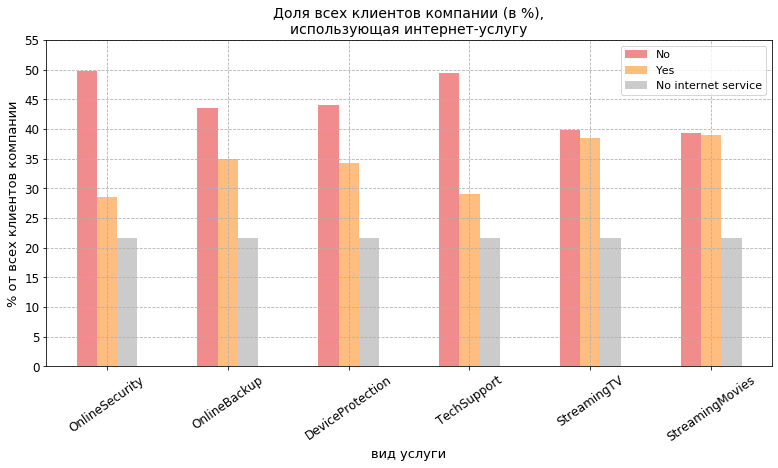

In [7]:
fig, ax = plt.subplots(figsize = (13, 6))
df_i_serv.plot.bar(ax = ax, alpha = 0.5, color = cm.get_cmap('Set1', 3).colors)
plt.title('Доля всех клиентов компании (в %),\nиспользующая интернет-услугу', fontsize =14)
plt.xlabel('вид услуги', fontsize = 13)
plt.ylabel('% от всех клиентов компании', fontsize = 13)
plt.xticks(rotation = 35, fontsize = 12)
plt.yticks(np.arange(0, 60, 5), fontsize = 12)
plt.grid(linestyle = '--')
plt.legend(fontsize = 11)
plt.show()

Из приведенного выше графика видно, что наименее популярными являются услуги "OnlineSecurity" и "TechSupport", наиболее популярными - "StreamingTV" и "StreamingMovies".

**Выясним, сколько времени клиенты компании пользуются ее услугами:**

In [8]:
df_time = dat.tenure
df_time.describe()

count    5986.000000
mean       32.468760
std        24.516391
min         0.000000
25%         9.000000
50%        29.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64

Среднее время пользования услугами компании составляет 32,47 месяца, медианное - 29 месяцев, максимальное - 72 месяца. 

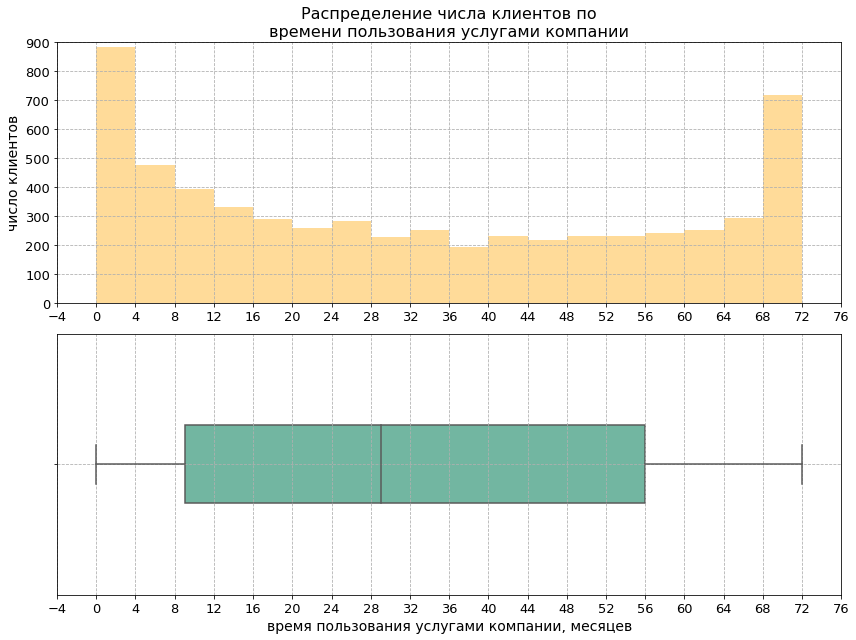

In [9]:
fig, ax = plt.subplots(2, 1, figsize = (12, 9))
sns.distplot(df_time, bins = 18, color = 'orange', kde = False, ax= ax[0], hist_kws = {'alpha': 0.4}, axlabel = False)
ax[0].set_yticks(np.arange(0, 950, 100))
ax[0].set_xticks(np.arange(-4,80, 4))
ax[0].set_xlim(left=-4,right=76)
ax[0].set_ylim(bottom = 0, top = 900)
ax[0].grid(linestyle = '--')
ax[0].tick_params(labelsize = 13)
ax[0].set_title("Распределение числа клиентов по\nвремени пользования услугами компании", fontsize = 16)
sns.boxplot(df_time, ax = ax[1], width = 0.3, palette ='Set2')
ax[1].set_xticks(np.arange(-4,80, 4))
ax[1].set_xlim(left=-4,right=76)
ax[1].tick_params(labelsize = 13)
ax[1].grid(linestyle = '--')
ax[1].set_xlabel('время пользования услугами компании, месяцев', fontsize = 14)
ax[0].set_ylabel('число клиентов', fontsize = 14)
plt.tight_layout()
plt.show()

На графике наблюдаются два пика распределения: слева и справа. Пик справа может объясняться тем, что значительная часть клиентов была привлечена в первое время после старта бизнеса компании. Для пика слева есть два варианта объяснения: <br>1) Компания осуществила значительное привлечение клиентов в последние 4 месяца перед сбором данной статистики, пик слева формируется группой самых новых клиентов <br>2) В первые четыре месяца пользования услугами компании часто проходит отток клиетов, пик слева формируется разными группами клиентов, для которых произошел отток в разное время. <br> Ответ на то, какой вариант верный, будет дан во второй части работы (при рассмотрении зависимости показателя оттока от времени пользования услугами компании).

**Посмотрим, какие типы контрактов и методы оплаты предпочитают клиенты:**

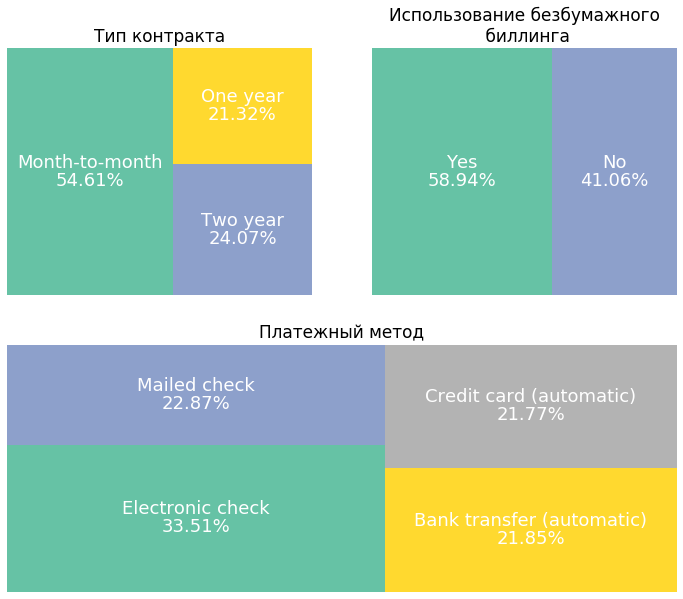

In [10]:
df_pay_method = dat.iloc[:,15:18]
colors = cm.get_cmap('Set2', 4).colors
grid = plt.GridSpec(2, 2, hspace = 0.2)
fig = plt.figure(figsize = (12, 10))
titles = ['Тип контракта', 'Использование безбумажного\n биллинга',\
         'Платежный метод']
for i, col_name in enumerate(df_pay_method.columns):
    if i!=2:
        axc = plt.subplot(grid[i//2, i%2])
    else:
        axc = plt.subplot(grid[1, :2])
    dfc = np.round(df_pay_method[col_name].value_counts()*100/total_clients, 2)
    squarify.plot(sizes=dfc, label=dfc.index,
              color = colors, alpha = 1, value = dfc.astype(str)+'%',\
                        text_kwargs = {'fontsize':18, 'color': 'white'}, ax = axc)    
    axc.axis('off')
    axc.set_title(titles[i], fontsize =17)
plt.show()

Наиболее популярный тип контракта - ежемесячный, безбумажным биллингом пользуются более половины клиентов, самый популярный платежный метод - электронный чек.

**Исследуем структуру платежей клиентов:**

Выведем основную статистическую информацию по ежемесячным платежам и полным платежам (за все время) клиентов.

In [11]:
df_pay = dat.iloc[:,18:20]
df_pay.describe()

,MonthlyCharges,TotalCharges
count,5986.000000,5986.000000
mean,64.802213,2296.580647
std,30.114702,2272.514574
min,18.250000,18.800000
25%,35.650000,406.275000
50%,70.400000,1412.150000
75%,89.900000,3841.500000
max,118.750000,8684.800000


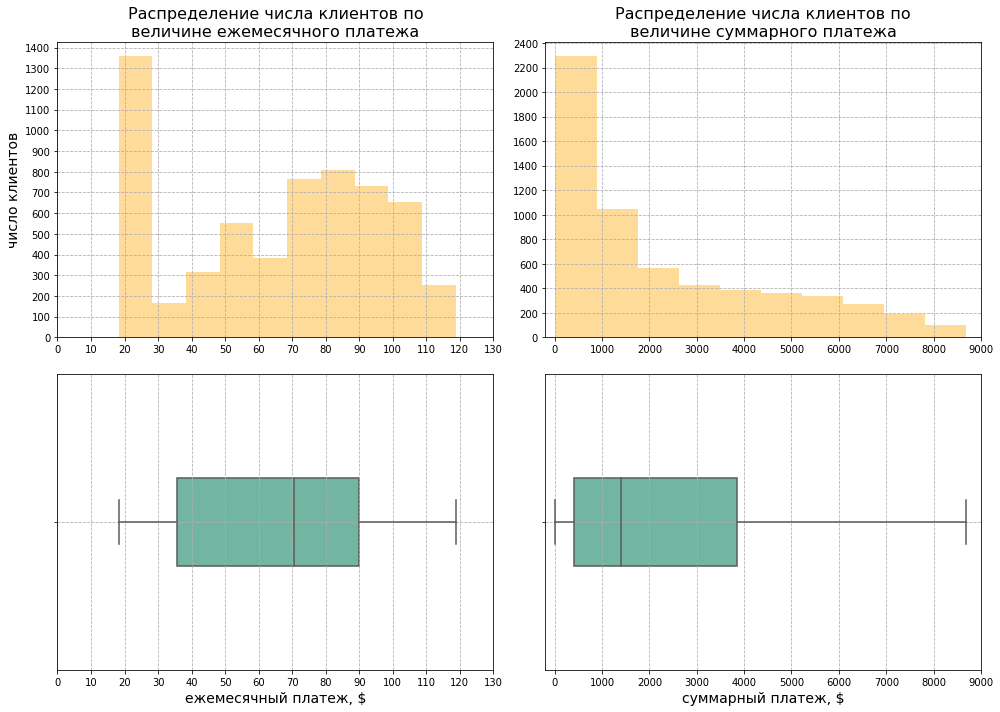

In [12]:
fig, ax = plt.subplots(2, 2, figsize = (14, 10))
for i in [0, 1]:
    sns.distplot(df_pay.iloc[:, i], bins = 10, color = 'orange', kde = False, ax= ax[0, i], hist_kws = {'alpha': 0.4}, axlabel = False)
    sns.boxplot(df_pay.iloc[:,i], ax = ax[1, i], width = 0.3, palette ='Set2')
    ax[i, 0].set_xticks(np.arange(0, 140, 10))
    ax[i, 1].set_xticks(np.arange(0, 10000, 1000))
    ax[i, 0].grid(linestyle = '--')
    ax[i, 1].grid(linestyle = '--')
    ax[i, 0].set_xlim(left = 0, right = 130)
    ax[i, 1].set_xlim(left = -200, right = 9000)
ax[0, 0].set_yticks(np.arange(0, 1500, 100))
ax[0, 1].set_yticks(np.arange(0, 2500, 200))
ax[1, 0].set_xlabel('ежемесячный платеж, $', fontsize = 14)
ax[1, 1].set_xlabel('суммарный платеж, $', fontsize = 14)
ax[0, 0].set_ylabel('число клиентов', fontsize = 14)
ax[0, 0].set_title("Распределение числа клиентов по\nвеличине ежемесячного платежа", fontsize = 16)
ax[0, 1].set_title("Распределение числа клиентов по\nвеличине суммарного платежа", fontsize = 16)
plt.tight_layout(w_pad=1, h_pad=2.0)
plt.show()

**Наконец, посмотрим на важнейший параметр - отток клиентов:**

In [13]:
df_churn = dat['Churn'].value_counts()
df_churn

No     4399
Yes    1587
Name: Churn, dtype: int64

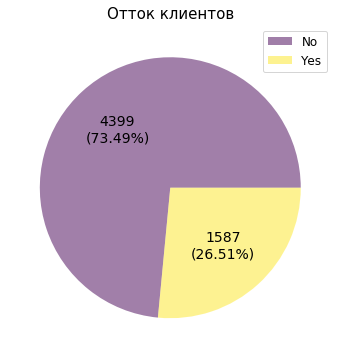

In [14]:
colors = cm.get_cmap('viridis', 2).colors
fig, ax = plt.subplots(figsize = (10, 6))


ax.pie(df_churn, colors = colors, \
            radius = 1, labels = df_churn.index, labeldistance = None, textprops = {'size':14},\
            autopct = lambda x: f'{int(np.round(x*df_churn.sum()/100))}\n({np.round(x, 2)}%)', wedgeprops = {'alpha':0.5})
ax.legend(fontsize = 12, loc = 'best')
ax.set_title("Отток клиентов", fontsize =15)
plt.show()

Видим, что отток составил 26.51%, что составляет более четверти клиентов компании. В следующем пункте курсовой будут даны рекомендации по тому, как можно уменьшить отток.

# 2. Исследование зависимостей и формулирование гипотез

Для дальнейших исследований необходимо заменить категориальные переменные числовыми. Замену осуществим путем применения следующего кода:

In [15]:
map_dict = {'Male':1, 'Female':0, 'Yes':1, 'No':0, 'No phone service':2, 'No internet service': 2, 'DSL':1, 'Fiber optic':2, 'Month-to-month':0,\
           'One year':1, 'Two year':2, **dict(zip(np.unique(dat.PaymentMethod), range(4)))}
print(f'Словарь соответствий категорийных переменных и числовых значений:\n{map_dict}\n')
dat.index = dat.customerID
dat2 = dat.iloc[:,1:].applymap(lambda x: map_dict[x] if x in map_dict.keys() else x)
dat2.head(5)

Словарь соответствий категорийных переменных и числовых значений:
{'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0, 'No phone service': 2, 'No internet service': 2, 'DSL': 1, 'Fiber optic': 2, 'Month-to-month': 0, 'One year': 1, 'Two year': 2, 'Bank transfer (automatic)': 0, 'Credit card (automatic)': 1, 'Electronic check': 2, 'Mailed check': 3}



,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7010-BRBUU,1,0,1,1,72,1,1,0,2,2,2,2,2,2,2,0,1,24.10,1734.65,0
9688-YGXVR,0,0,0,0,44,1,0,2,0,1,1,0,1,0,0,1,1,88.15,3973.20,0
9286-DOJGF,0,1,1,0,38,1,1,2,0,0,0,0,0,0,0,1,0,74.95,2869.85,1
6994-KERXL,1,0,0,0,4,1,0,1,0,0,0,0,0,1,0,1,2,55.90,238.50,0
2181-UAESM,1,0,0,0,2,1,0,1,1,0,1,0,0,0,0,0,2,53.45,119.50,0


Посмотрим на тепловую карту корреляций фичей между собой:

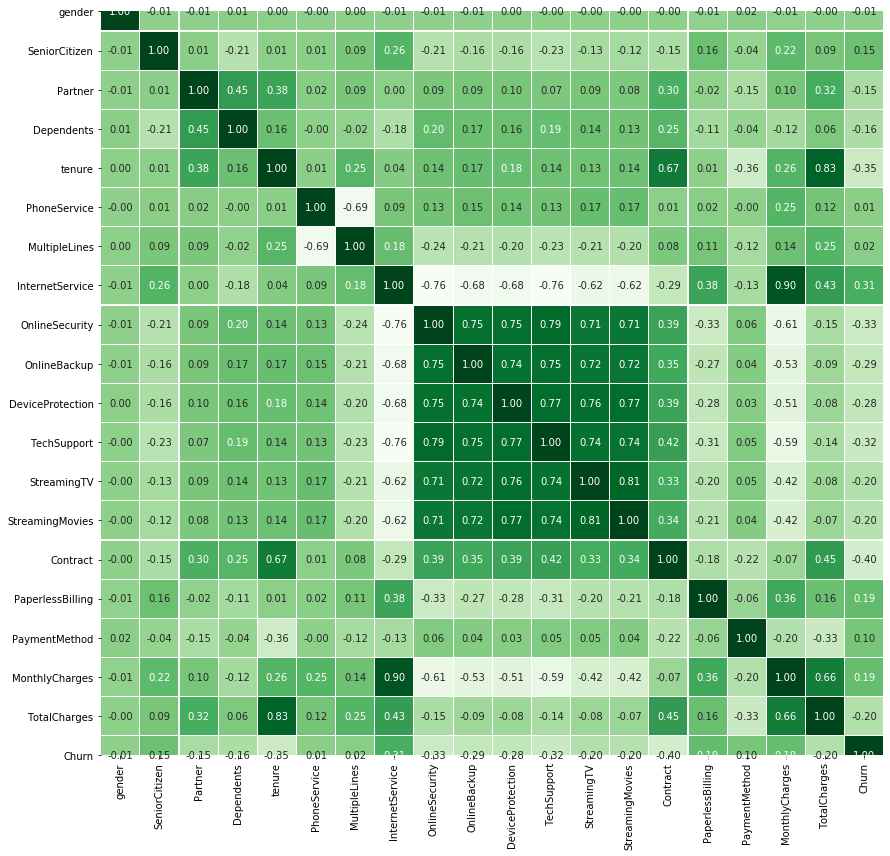

In [16]:
corr_mtx = dat2.corr()
fig, ax = plt.subplots(figsize=(14, 12))
sns.heatmap(corr_mtx, linewidths=0.2, ax = ax, linewidth = 0.1,
            square=True, cmap= 'Greens', linecolor='white', annot=True, annot_kws = {'fontsize':10}, fmt = '.2f', cbar = False)
plt.tight_layout()
plt.show()

Выведем датафрейм с абсолютными значениями корреляций фичей с переменной Churn в порядке убывания:

In [17]:
#Добавляем столбец с модулем коэффициента корреляции для дальнейшей сортировки
corr_mtx['Churn_abs'] = np.abs(corr_mtx.Churn)
#После сортировки выбираем строки, начиная с первой, потому что в нулевой будет содержаться имя самой переменной Churn (имеет 
#наибольшую корреляцию сама с собой)
corr_mtx.sort_values('Churn_abs', ascending = False).iloc[1:, :]['Churn_abs'].to_frame(name = 'Модуль коэффициента\
 корреляции с Churn')

,Модуль коэффициента корреляции с Churn
Contract,0.396446
tenure,0.348469
OnlineSecurity,0.330192
TechSupport,0.323871
InternetService,0.310417
OnlineBackup,0.287948
DeviceProtection,0.279261
StreamingMovies,0.204499
StreamingTV,0.203010
TotalCharges,0.197156


Видим, что фичи MultipleLines, gender, PhoneService имеют ничтожно малую корреляцию с целевой переменной Churn, поэтому сразу
убираем их из рассмотрения. Анализ фичей tenure, MonthlyCharges, TotalCharges, имеющих непрерывный тип float, будет произведен далее с помощью графиков типа boxplot. Ниже построены столбчатые диаграммы для оставшихся фичей. В каждой из столбчатых диаграмм для наглядного сравнения мы добавили группу столбцов Expexted_churn (ожидаемый отток), которая показывает, каким был бы отток клиентов в случае отсутствия какой-либо корреляции между оттоком и рассматриваемым параметром. Рассчитывается Expected_churn путем умножения соответствующего числа клиентов, для которых отток не произошел, на коэффициент 26.51% /73.49% (см. пункт 1 настоящей работы и датафрейм df_churn).

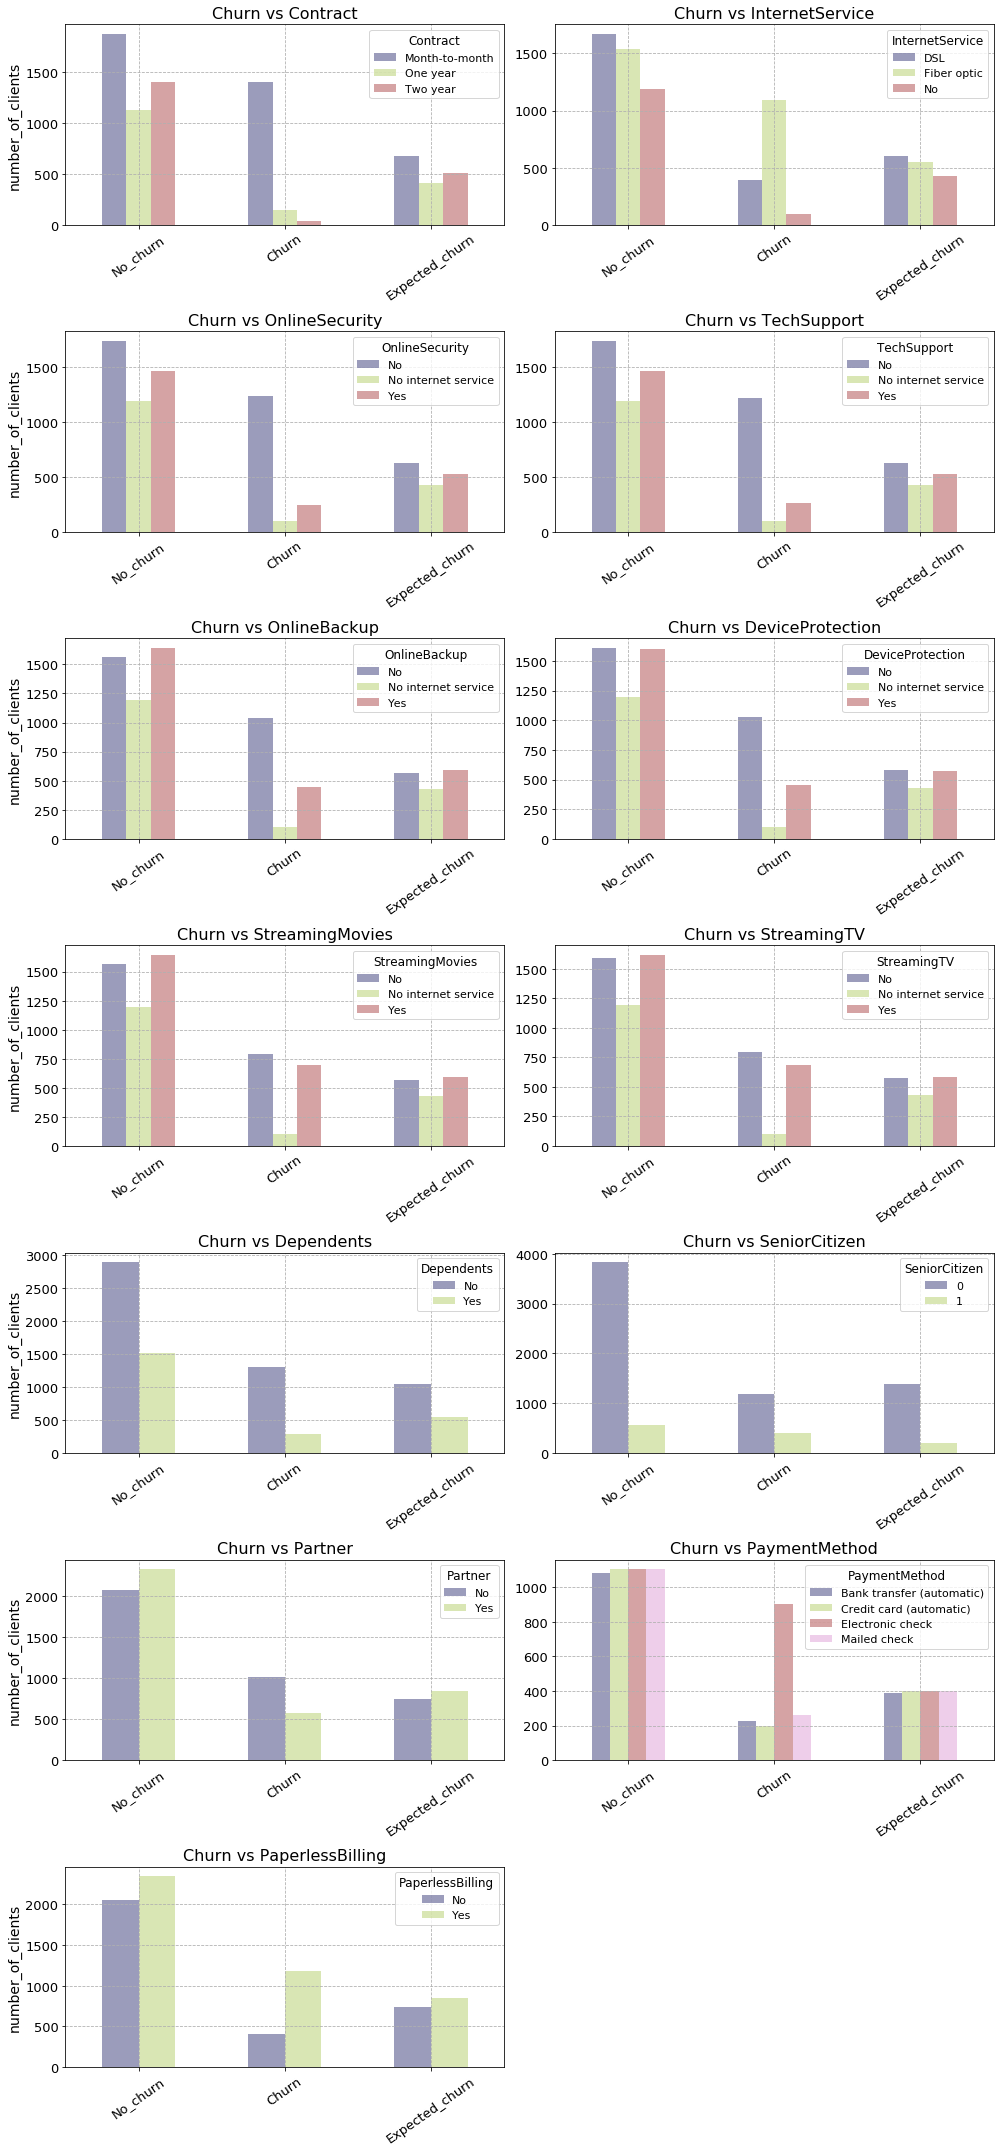

In [18]:
ex_ratio = df_churn.Yes/ df_churn.No #Отношение числа клиентов, у которых произошел отток, к числу клиентов без оттока
titles = ['Contract', 'InternetService', 'OnlineSecurity', 'TechSupport', 'OnlineBackup', 'DeviceProtection',
         'StreamingMovies', 'StreamingTV', 'Dependents', 'SeniorCitizen', 'Partner', 'PaymentMethod', 'PaperlessBilling']
fig = plt.figure(figsize = (14, 30))
for i, title in enumerate(titles):
    temp_df = dat.groupby(['Churn', title]).agg({title: 'count'}).unstack(level = 1)
    temp_df.columns = temp_df.columns.get_level_values(1)
    temp_df.loc['Expected_churn', :] = temp_df.loc['No', :]*ex_ratio
    axc = fig.add_subplot(7, 2, i+1)
    temp_df.plot.bar(ax = axc, alpha = 0.5, color = cm.get_cmap('tab20b', 4).colors)
    axc.set_xlabel(None)
    axc.tick_params(labelsize = 13)
    axc.set_xticklabels(labels = ['No_churn', 'Churn', 'Expected_churn'], rotation = 35)
    axc.set_title('Churn vs ' + title, fontsize = 16)
    axc.legend(fontsize = 11, title = title, title_fontsize =12)
    axc.grid(linestyle = '--')
    if not(i%2):
        axc.set_ylabel('number_of_clients', fontsize = 14)
plt.tight_layout()
plt.show()

В каждой из столбчатых диаграмм для наглядного сравнения мы добавили группу столбцов Expexted_churn (ожидаемый отток), которая показывает, каким был бы отток клиентов в случае отсутствия какой-либо корреляции между оттоком и рассматриваемым параметром. Рассчитывается Expected_churn путем умножения соответствующего числа клиентов, для которых отток не произошел, на коэффициент 26.51% /73.49% (см. пункт 1 настоящей работы и датафрейм df_churn). Из диаграмм выше можно сделать следующие выводы:<br>

    1) Отток клиентов с контрактом "Month-to-month" выше ожидаемого, с контрактом "One year" - ниже ожидаемого, с контрактом "Two year" - значительно ниже ожидаемого. Компании выгодны клиенты с контрактами "Two year", "One year" и невыгодны клиенты с контрактом "Month-to-month". Следует стремиться максимизировать число контрактов первых двух типов и минимизировать количество контрактов "Month-to-month".
    
    2) Отток клиентов с доступом в интернет через DSL меньше ожидаемого, отток клиентов с доступом в интернет по оптоволокну - в два раза больше ожидаемого. Это говорит не о том, что компании надо сосредоточиться на технологии DSL (поскольку она устаревшая), а о том, что, возможно, есть проблемы с качеством интернет - соединения по оптоволокну. Компании необходимо уделить внимание этому вопросу.
    
    3) Отток клиентов с каждой из подключенных услуг "OnlineSecurity", "TechSupport", "Online Backup", "DeviceProtection" ниже ожидаемого, с неподключенной - выше ожидаемого. Компании выгодно продвигать эти услуги среди клиентов. Для услуг "StreamingMovies" и "StreamingTV" нет явной зависимости с показателем Churn - отток пользователей выше ожидаемого как для пользователей этих услуг, так и для клиентов, этих услуг не использующих. Влияние на показатель Churn, которое мы наблюдаем по тепловой карте, здесь опосредованное: через параметр "No internet service". Также из тепловой карты видно, что все фичи OnlineSecurity, TechSupport, Online Backup, DeviceProtection, StreamingMovies, StreamingTV достаточно сильно коррелированы между собой, значит, для более эффективной работы алгоритмов классификации для этих фичей можно будет произвести понижение размерности.
    
    4) Для людей, состоящих в браке, и людей с детьми отток ниже ожидаемого, что может быть связано с определенной консервативностью этих групп клиентов, соответственно, для холостых и бездетных отток выше ожидаемого. Довольно нетипично, что для рассматриваемой компании отток среди пенсионеров оказался выше, чем для клиентов непенсионного возраста (обычно бывает наоборот).
    
    5) На диаграмме для методов платежей видна яркая зависимость между исользованием электронного чека (Electronic check) и оттоком. Отток среди пользователей электронного чека более чем в два раза выше ожидаемого, тогда как отток среди пользователей всех остальных платежных методов ниже ожидаемого. Следовательно, более эффективным будет заменить фичу PaymentMethod на бинарную фичу ElectronicCheck (0 - электронный чек не используется, 1 - используется).
    
    6) Отток среди пользователей безбумажного биллинга выше ожидаемого, среди людей, не использующих безбумажный биллинг - ниже ожидаемого. Это может быть связано как с большей консервативностью пользователей традиционного (бумажного) биллинга, так и с какими-то проблемами и неудобством безбумажного биллинга в компании, этому вопросу необходимо уделить внимание.
    
Заметим также, что отток клиентов, не пользующихся интернетом ("No internet service") в компании значительно меньше ожидаемого. Это может говорить о том, что к услугамм телефонии компании претензий у клиентов, пользующихся только телефонией, нет.

Построим теперь распределение параметра tenure (сколько месяцев человек является клиентом компании) в зависимости от того, произошел ли отток, с помощью графика типа "ящик с усами":

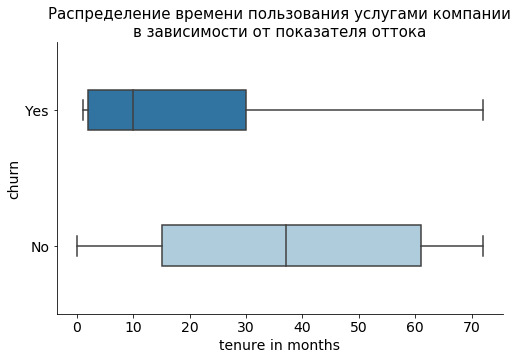

In [19]:
fig, ax = plt.subplots(figsize = (8, 5))
sns.boxplot(y = dat2.Churn, x = dat2.tenure, width = 0.3, palette ='Paired', ax = ax, orient = 'h')
plt.tick_params(labelsize = 14)
plt.yticks([1, 0], labels = ['Yes', 'No'])
plt.ylim(bottom =-0.5, top = 1.5)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xlabel('tenure in months', fontsize = 14)
plt.ylabel('churn', fontsize = 14)
plt.title('Распределение времени пользования услугами компании\nв зависимости от показателя оттока', fontsize = 15)
plt.show()

Мы видим, что медианное время пользования услугами компании клиентов, у которых произошел отток, меньше первого квартиля времени клиентов, у которых не произошел отток, а третий квартиль клиентов с оттоком меньше медианы клиентов без оттока. В целом, выделяя общую тенденцию, можно сказать, что время пользования услугами компании меньше у клиентов, у которых произошел отток. Это говорит о том, что компании особенно важно стараться удержать клиентов в первое время (особенно в первый год, как следует из графика). Также из графика видно, что пик слева на графике распределения клиентов компании по времени пользования услугами (см. пункт 1 настоящей работы), объясняется тем, что в первые месяцы часто проходит отток.<br>
    Построим теперь распределение параметров MonthlyCharges и TotalCharges в зависимости от того, произошел ли отток, с помощью графиков типа "ящик с усами":

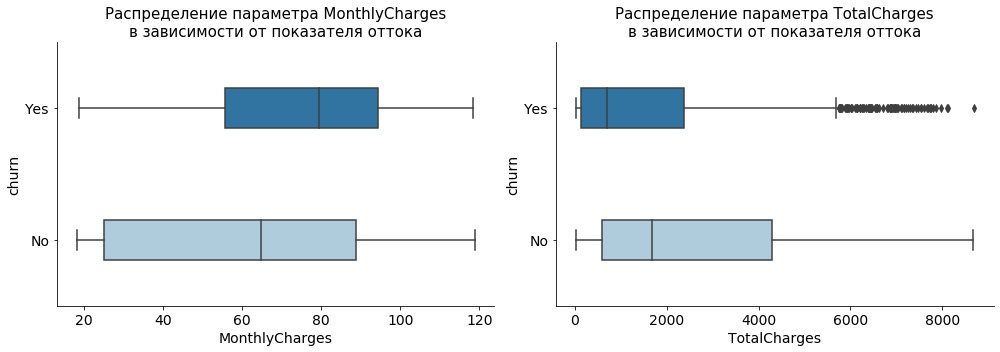

In [20]:
fig, ax = plt.subplots(1, 2, figsize = (14, 5))
titles = ['MonthlyCharges', 'TotalCharges']
for i in range(2):
    sns.boxplot(y = dat2.Churn, x = dat2[titles[i]], width = 0.3, palette ='Paired', ax = ax[i], orient = 'h')
    ax[i].tick_params(labelsize = 14)
    ax[i].set_yticklabels(['No', 'Yes'])
    ax[i].set_ylim(bottom =-0.5, top = 1.5)
    ax[i].spines['right'].set_visible(False)
    ax[i].spines['top'].set_visible(False)
    ax[i].set_xlabel(titles[i], fontsize = 14)
    ax[i].set_ylabel('churn', fontsize = 14)
    ax[i].set_title(f'Распределение параметра {titles[i]}\nв зависимости от показателя оттока', fontsize = 15)
plt.tight_layout()
plt.show()

По графикам выше видно, что, в среднем, отток выше у пользователей с большими ежемесячными платежами. Это может говорить о том, что при некотором наборе услуг цена пользования ими становится слишком высокой для клиента. Компании следует пересмотреть свою ценовую политику. Что касается полных платежей, то здесь наоборот отток выше у клиентов с меньшими полными платежами за все время, но это всего лишь следствие того, что такие клиенты пользовались услугами компании меньшее время.
В завершение этого раздела курсовой работы введем, как говорилось выше, фичу ElectronicCheck, и посмотрим на ее корреляцию с целевой переменной Churn:

In [21]:
dat2['ElectronicCheck'] = (dat2.PaymentMethod == 2).astype(int) # 2 в датафрейме dat2 соответствует методу платежа "Electronic check"
dat2[['ElectronicCheck','Churn']].corr()

,ElectronicCheck,Churn
ElectronicCheck,1.000000,0.296803
Churn,0.296803,1.000000


Этот коэффициент корреляции гораздо выше, чем коэффициент корреляции Churn и PaymentMethod, который составлял всего 0.104. Поэтому далее в моделях обучения мы будем использовать фичу ElectronicCheck и не будем использовать PaymentMethod.

# 3. Построение моделей для прогнозирования оттока

In [22]:
#Импортируем необходимые библиотеки для машинного обучения
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from xgboost import XGBClassifier

In [23]:
y = dat2.Churn                   #Целевая переменная, таргет
X = dat2.drop(columns = 'Churn') #Матрица фичей (датафрейм dat2 без столбца 'Churn')

Для более эффективной работы алгоритмов квалификации желательно, чтобы масштабы используемых фичей были сопоставимы. Дискретные фичи в нашем случае принимают максимальное значение 3, тогда как фича TotalCharges имеет максимум, больший восьми тысяч. Масштабы фичей tenure и MonthlyCharges также намного превосходят масштабы дискретных фичей. Поэтому произведем нормализацию фичей tenure, MonthlyCharges, TotalCharges на их максиальные значения (опытным путем установлено, что на данной задаче обычная нормализация дает лучший результат, чем StandardScaler, по точности моделей).

In [24]:
#Производим нормализацию
X[['tenure', 'MonthlyCharges', 'TotalCharges']] = X[['tenure', 'MonthlyCharges', 'TotalCharges']].apply(lambda z: z/z.max())
#Делим датасет на тестовый и валидационный
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.3, random_state=14, stratify = y)
skf = StratifiedKFold(n_splits=5, random_state=14) #Нужен для кросс-валидации

Осуществим PCA-преобразование для фичей OnlineSecurity, TechSupport, Online Backup, DeviceProtection, StreamingMovies, StreamingTV (о целесообразности этого написано в пункте 2 настоящей работы), заменив их одной фичой PCA:

In [25]:
pca = PCA(n_components=1).fit(X_train.iloc[:,8:12])
X_train['PCA'] = pca.transform(X_train.iloc[:,8:12])
X_test['PCA'] =  pca.transform(X_test.iloc[:,8:12])

Формируем итоговый набор фичей для моделей классификации:

In [26]:
X_train = X_train[['Contract', 'tenure', 'InternetService', 'PCA', 'TotalCharges', 'MonthlyCharges', 'ElectronicCheck', 'Dependents',
                  'SeniorCitizen', 'Partner', 'PaperlessBilling']]
X_test = X_test[['Contract', 'tenure', 'InternetService', 'PCA', 'TotalCharges', 'MonthlyCharges', 'ElectronicCheck', 'Dependents',
                  'SeniorCitizen', 'Partner', 'PaperlessBilling']]

Будем использовать следующие алгоритмы: DecisionTreeClassifier, GaussianNB, KNeighborsClassifier, SVC, LinearSVC, XGBClassifier, RandomForestClassifier, LogisticRegression. Для каждого из алгоритмов (кроме GaussianNB) настроим часть гиперпараметров с помощью пятикратной кросс-валидации в методе GridSearchCV. Также для алгоритмов, поддерживающих настройку количества фичей (это алгоритмы DecisionTreeClassifier, XGBClassifier, RandomForestClassifier, LogisticRegression) осуществим уменьшение количества фичей в соответствии с процедурой RFECV (Recursive feature elimination with cross-validation).

In [27]:
init_estimators = [DecisionTreeClassifier(class_weight = {0:ex_ratio, 1:1}, random_state = 14),  GaussianNB(), KNeighborsClassifier(),
              SVC(class_weight = {0:ex_ratio, 1:1}, random_state=14, probability = True, kernel = 'rbf'), 
              SVC(class_weight = {0:ex_ratio, 1:1}, random_state=14, probability = True, kernel = 'linear'),
              XGBClassifier(scale_pos_weight= 1/ex_ratio, subsample = 0.7, n_estimators = 20, max_depth = 3, random_state = 14, eta = 0.1),
              RandomForestClassifier(class_weight = {0:ex_ratio, 1:1}, random_state=14), 
              LogisticRegression(class_weight = {0:ex_ratio, 1:1}, random_state=14, max_iter = 100)] 

estimator_names = [str(i).split('(')[0] for i in init_estimators]
estimator_names[3] = "SVC(kernel = 'rbf')"
estimator_names[4] = "SVC(kernel = 'linear')"
estimator_names.append('Stacking')
reports_dict = {} #В этом словаре будут храниться classification_report'ы для каждой модели
roc_auc_dict = {} #В этом словаре будут храниться roc_auc для каждой модели

Для визуализации матрицы ошибок и построения кривой ошибок создадим функцию make_graphs. Поставим в соответствие классу 0 (Not Churn) зеленый цвет, классу 1 (Churn) - синий, причем темными цветами отображаются верно классифицированные моделью объекты (TN и TP), светлыми цветами - объекты, на которых модель ошиблась (FP и FN).

In [28]:
def make_graphs(estimator_name, y_test, pred, pproba):
    
    
    conf_mx = confusion_matrix(y_test, pred)
    titles = ['TN', 'FP', 'FN', 'TP']
    fig, ax = plt.subplots(1, 2, figsize = (10, 5))
    ax[0].pcolormesh([[4, 1], [5, 8]], norm = Normalize(1, 20), cmap  = 'tab20b', alpha = 0.7)
    offset_x, offset_y = 0.15, 0.15
    k = 0
    for j in [3, 1]:
        for i in [1, 3]:
            ax[0].text(0.5*i - offset_x, 0.5*j - offset_y, f'  {titles[k]}\n({conf_mx[k//2, k%2]})', fontdict = {'size':16})
            k +=1
    ax[0].set_title(f'Матрица ошибок для классификатора\n{estimator_name}:', fontsize = 12)
    fpr,tpr, _ = roc_curve(y_test, pproba)
    ax[0].axis('off')
    ax[1].plot(fpr, tpr, color = '#0DABA8')
    ax[1].grid(linestyle = '--')
    ax[1].tick_params(labelsize = 12)
    ax[1].set_xticks(np.arange(0, 1.1, 0.1))
    ax[1].set_yticks(np.arange(0, 1.1, 0.1))
    ax[1].set_title(f'Кривая ошибок для классификатора\n{estimator_name}:', fontsize = 13)
    ax[1].text(0.35, 0.52, f'AUC = {np.round(roc_auc_score(y_test, pproba), 4)}', fontdict = {'size':16})
    ax[1].set_xlabel('FPR', fontsize = 12)
    ax[1].set_ylabel('TPR', fontsize = 12)
    plt.tight_layout()
    plt.show()

***Модель DecisionTreeClassifier***<br>
Для данной модели доступны как рекурсивный подбор оптимального количества фичей, так и настройка гиперпараметров с помощью кросс-валидации.

In [29]:
mask = RFECV(estimator = init_estimators[0], cv = skf, scoring = 'roc_auc').fit(X_train, y_train).support_
selected_columns = X_test.columns[mask]
print(f'Оптимальный состав фичей для алгоритма {estimator_names[0]}:\n{selected_columns.values}')
X_train1 = X_train[selected_columns] #Оставляем только определенные с помощью RFECV фичи
X_test1 = X_test[selected_columns]

Оптимальный состав фичей для алгоритма DecisionTreeClassifier:
['Contract' 'tenure' 'TotalCharges' 'MonthlyCharges']


Подобранные на кросс-валидации гиперпараметры для алгоритма DecisionTreeClassifier
{'max_depth': 4, 'max_features': 2, 'min_samples_split': 2}


Основыне метрики качества классификации алгоритмом DecisionTreeClassifier:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82      1320
           1       0.53      0.76      0.63       476

    accuracy                           0.76      1796
   macro avg       0.72      0.76      0.73      1796
weighted avg       0.80      0.76      0.77      1796



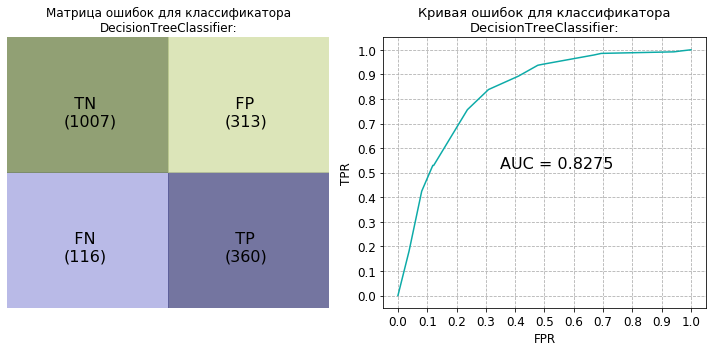

In [30]:
tree_params = {'max_depth': range(1, 10),  #Гиперпараметры для кросс-валидации
               'max_features': range(1, len(selected_columns)+1), 
               'min_samples_split': range(2, 5)}

dtc_model = GridSearchCV(estimator = init_estimators[0], param_grid = tree_params, cv = skf, error_score = 'roc_auc').fit(X_train1, y_train)
pred = dtc_model.predict(X_test1)
print(f'Подобранные на кросс-валидации гиперпараметры для алгоритма {estimator_names[0]}\n{dtc_model.best_params_}\n\n')
print(f'Основыне метрики качества классификации алгоритмом {estimator_names[0]}:\n{classification_report(y_test, pred)}')
reports_dict[estimator_names[0]] = classification_report(y_test, pred, output_dict = True)
pproba = dtc_model.predict_proba(X_test1)[:,1]
roc_auc_dict[estimator_names[0]] = roc_auc_score(y_test, pproba) 
make_graphs(estimator_names[0],  y_test, pred, pproba)

***Модель GaussianNB***<br>
Наивный байесовский классификатор - относительно простая модель. Она не имеет гиперпараметров для настройки и не поддерживает рекурсивный подбор оптимального количества фичей, поэтому используются все 11 выбранных ранее фичей.

Основыне метрики качества классификации алгоритмом GaussianNB:
              precision    recall  f1-score   support

           0       0.90      0.74      0.81      1320
           1       0.51      0.77      0.61       476

    accuracy                           0.74      1796
   macro avg       0.71      0.75      0.71      1796
weighted avg       0.80      0.74      0.76      1796



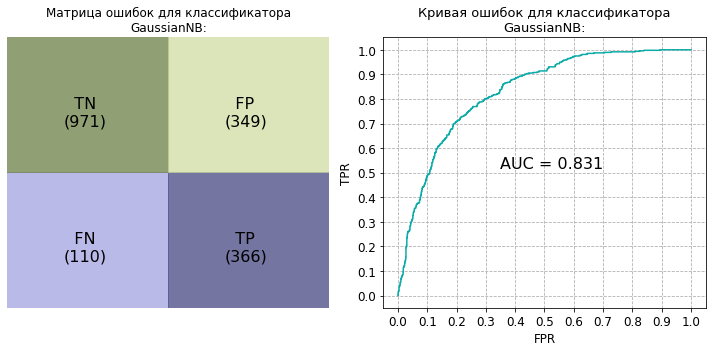

In [31]:
NB_model = GaussianNB().fit(X_train, y_train)
pred = NB_model.predict(X_test)
print(f'Основыне метрики качества классификации алгоритмом {estimator_names[1]}:\n{classification_report(y_test, pred)}')
reports_dict[estimator_names[1]] = classification_report(y_test, pred, output_dict = True)
pproba = NB_model.predict_proba(X_test)[:,1]
roc_auc_dict[estimator_names[1]] = roc_auc_score(y_test, pproba) 
make_graphs(estimator_names[1],  y_test, pred, pproba)

***Модель KNeighborsClassifier***<br>
В модели К ближайжих соседей можно настроить гиперпараметры на кросс-валидации, но эта модель не поддерживает рекурсивный подбор оптимального количества фичей, поэтому используются все 11 выбранных ранее фичей.

Подобранные на кросс-валидации гиперпараметры для алгоритма KNeighborsClassifier
{'n_neighbors': 6}


Основыне метрики качества классификации алгоритмом KNeighborsClassifier:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1320
           1       0.66      0.38      0.48       476

    accuracy                           0.78      1796
   macro avg       0.73      0.66      0.67      1796
weighted avg       0.77      0.78      0.76      1796



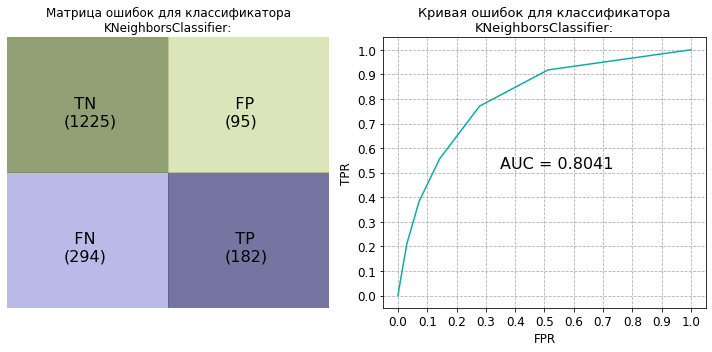

In [32]:
knn_params = {'n_neighbors': range(1, 9)}

knn_model = GridSearchCV(estimator = init_estimators[2], param_grid = knn_params, cv = skf, error_score = 'roc_auc').fit(X_train, y_train)
pred = knn_model.predict(X_test)
print(f'Подобранные на кросс-валидации гиперпараметры для алгоритма {estimator_names[2]}\n{knn_model.best_params_}\n\n')
print(f'Основыне метрики качества классификации алгоритмом {estimator_names[2]}:\n{classification_report(y_test, pred)}')
reports_dict[estimator_names[2]] = classification_report(y_test, pred, output_dict = True)
pproba = knn_model.predict_proba(X_test)[:,1]
roc_auc_dict[estimator_names[2]] = roc_auc_score(y_test, pproba) 
make_graphs(estimator_names[2],  y_test, pred, pproba)

***Модель SVC с вычислительным ядром rbf***<br>
Эта модель позволяет настроить гиперпараметры на кросс-валидации, но не поддерживает рекурсивный подбор оптимального количества фичей, поэтому используются все 11 выбранных ранее фичей.

Подобранные на кросс-валидации гиперпараметры для алгоритма SVC(kernel = 'rbf')
{'C': 1.7999999999999998}


Основыне метрики качества классификации алгоритмом SVC(kernel = 'rbf'):
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1320
           1       0.50      0.82      0.62       476

    accuracy                           0.73      1796
   macro avg       0.71      0.76      0.71      1796
weighted avg       0.81      0.73      0.75      1796



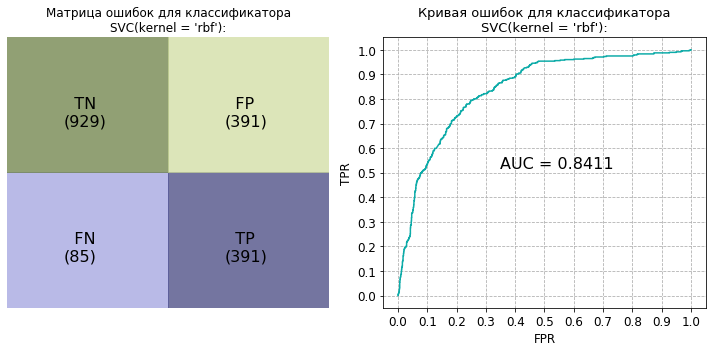

In [33]:
svc_params = {'C': np.arange(1, 2.0, 0.2)}
          
svc_model = GridSearchCV(estimator = init_estimators[3], param_grid = svc_params, cv = skf, error_score = 'roc_auc').fit(X_train, y_train)
pred = svc_model.predict(X_test)
print(f'Подобранные на кросс-валидации гиперпараметры для алгоритма {estimator_names[3]}\n{svc_model.best_params_}\n\n')
print(f'Основыне метрики качества классификации алгоритмом {estimator_names[3]}:\n{classification_report(y_test, pred)}')
reports_dict[estimator_names[3]] = classification_report(y_test, pred, output_dict = True)
pproba = svc_model.predict_proba(X_test)[:,1]
roc_auc_dict[estimator_names[3]] = roc_auc_score(y_test, pproba) 
make_graphs(estimator_names[3],  y_test, pred, pproba)

***Модель SVC с вычислительным ядром linear***<br>
Эта модель позволяет настроить гиперпараметры на кросс-валидации, но не поддерживает рекурсивный подбор оптимального количества фичей, поэтому используются все 11 выбранных ранее фичей.

Подобранные на кросс-валидации гиперпараметры для алгоритма SVC(kernel = 'linear')
{'C': 1.5999999999999999}


Основыне метрики качества классификации алгоритмом SVC(kernel = 'linear'):
              precision    recall  f1-score   support

           0       0.92      0.70      0.80      1320
           1       0.50      0.82      0.62       476

    accuracy                           0.73      1796
   macro avg       0.71      0.76      0.71      1796
weighted avg       0.81      0.73      0.75      1796



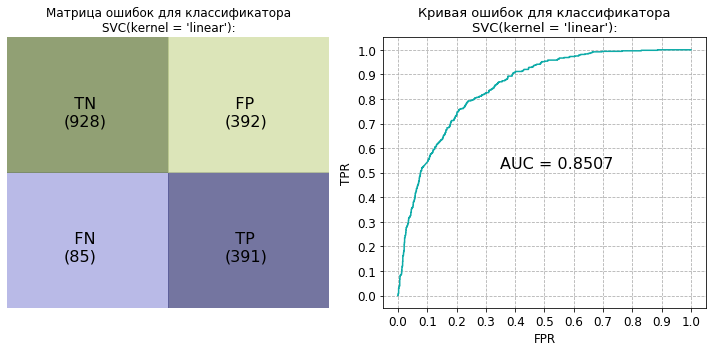

In [34]:
svclinear_params = {'C': np.arange(1, 2, 0.2)}

svclinear_model = GridSearchCV(estimator = init_estimators[4], param_grid = svclinear_params, cv = skf, error_score = 'roc_auc').fit(X_train, y_train)
pred = svclinear_model.predict(X_test)
print(f'Подобранные на кросс-валидации гиперпараметры для алгоритма {estimator_names[4]}\n{svclinear_model.best_params_}\n\n')
print(f'Основыне метрики качества классификации алгоритмом {estimator_names[4]}:\n{classification_report(y_test, pred)}')
reports_dict[estimator_names[4]] = classification_report(y_test, pred, output_dict = True)
pproba = svclinear_model.predict_proba(X_test)[:,1]
roc_auc_dict[estimator_names[4]] = roc_auc_score(y_test, pproba) 
make_graphs(estimator_names[4],  y_test, pred, pproba)

***Модель XGBClassifier***<br>
Эта модель позволяет настроить гиперпараметры на кросс-валидации и поддерживает рекурсивный подбор оптимального количества фичей.

In [35]:
mask = RFECV(estimator = init_estimators[5], cv = skf, scoring = 'roc_auc').fit(X_train, y_train).support_
selected_columns = X_test.columns[mask]
print(f'Оптимальный состав фичей для алгоритма {estimator_names[5]}:\n{selected_columns.values}')
X_train2 = X_train[selected_columns] #Оставляем только определенные с помощью RFECV фичи
X_test2 = X_test[selected_columns]

Оптимальный состав фичей для алгоритма XGBClassifier:
['Contract' 'tenure' 'InternetService' 'PCA' 'TotalCharges'
 'MonthlyCharges' 'ElectronicCheck' 'SeniorCitizen' 'Partner'
 'PaperlessBilling']


Подобранные на кросс-валидации гиперпараметры для алгоритма XGBClassifier
{'eta': 0.15, 'min_child_weight': 7}


Основыне метрики качества классификации алгоритмом XGBClassifier:
              precision    recall  f1-score   support

           0       0.92      0.75      0.83      1320
           1       0.54      0.82      0.65       476

    accuracy                           0.77      1796
   macro avg       0.73      0.78      0.74      1796
weighted avg       0.82      0.77      0.78      1796



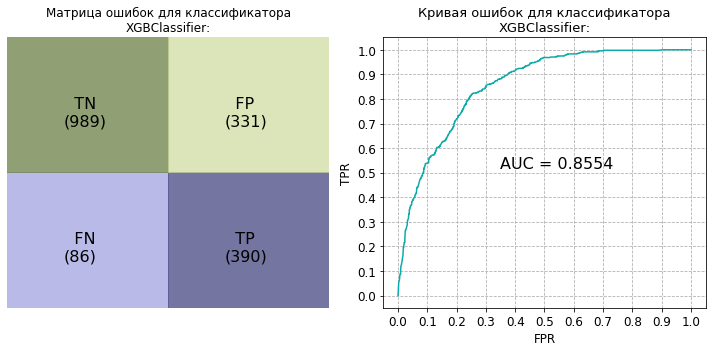

In [36]:
xgb_params={'eta': [0.05, 0.1, 0.15],
            'min_child_weight': range(3, 11)}    

xgb_model = GridSearchCV(estimator = init_estimators[5], param_grid = xgb_params, cv = skf, error_score = 'roc_auc').fit(X_train2, y_train)
pred = xgb_model.predict(X_test2)
print(f'Подобранные на кросс-валидации гиперпараметры для алгоритма {estimator_names[5]}\n{xgb_model.best_params_}\n\n')
print(f'Основыне метрики качества классификации алгоритмом {estimator_names[5]}:\n{classification_report(y_test, pred)}')
reports_dict[estimator_names[5]] = classification_report(y_test, pred, output_dict = True)
pproba = xgb_model.predict_proba(X_test2)[:,1]
roc_auc_dict[estimator_names[5]] = roc_auc_score(y_test, pproba) 
make_graphs(estimator_names[5],  y_test, pred, pproba)

***Модель RandomForestClassifier***<br>
Модель "случайного леса" позволяет настроить гиперпараметры на кросс-валидации и поддерживает рекурсивный подбор оптимального количества фичей.

In [37]:
mask = RFECV(estimator = init_estimators[6], cv = skf, scoring = 'roc_auc').fit(X_train, y_train).support_
selected_columns = X_test.columns[mask]
print(f'Оптимальный состав фичей для алгоритма {estimator_names[6]}:\n{selected_columns.values}')
X_train3 = X_train[selected_columns] #Оставляем только определенные с помощью RFECV фичи
X_test3 = X_test[selected_columns]

Оптимальный состав фичей для алгоритма RandomForestClassifier:
['Contract' 'tenure' 'InternetService' 'PCA' 'TotalCharges'
 'MonthlyCharges' 'ElectronicCheck' 'Dependents' 'SeniorCitizen' 'Partner'
 'PaperlessBilling']


Подобранные на кросс-валидации гиперпараметры для алгоритма RandomForestClassifier
{'max_depth': 6, 'max_features': 6, 'min_samples_split': 3}


Основыне метрики качества классификации алгоритмом RandomForestClassifier:
              precision    recall  f1-score   support

           0       0.90      0.79      0.84      1320
           1       0.56      0.75      0.64       476

    accuracy                           0.78      1796
   macro avg       0.73      0.77      0.74      1796
weighted avg       0.81      0.78      0.79      1796



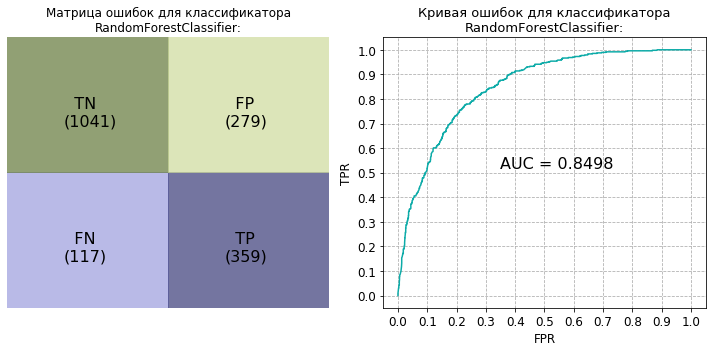

In [38]:
rfc_params = {'max_depth': range(3, 7), 
               'max_features': range(1, len(selected_columns)+1), 
               'min_samples_split': range(2, 5)}

rfc_model = GridSearchCV(estimator = init_estimators[6], param_grid = rfc_params, cv = skf, error_score = 'roc_auc').fit(X_train3, y_train)
pred = rfc_model.predict(X_test3)
print(f'Подобранные на кросс-валидации гиперпараметры для алгоритма {estimator_names[6]}\n{rfc_model.best_params_}\n\n')
print(f'Основыне метрики качества классификации алгоритмом {estimator_names[6]}:\n{classification_report(y_test, pred)}')
reports_dict[estimator_names[6]] = classification_report(y_test, pred, output_dict = True)
pproba = rfc_model.predict_proba(X_test3)[:,1]
roc_auc_dict[estimator_names[6]] = roc_auc_score(y_test, pproba) 
make_graphs(estimator_names[6],  y_test, pred, pproba)          

***Модель LogisticRegression***<br>
Модель логистической регрессии позволяет настроить гиперпараметры на кросс-валидации и поддерживает рекурсивный подбор оптимального количества фичей.

In [39]:
mask = RFECV(estimator = init_estimators[7], cv = skf, scoring = 'roc_auc').fit(X_train, y_train).support_
selected_columns = X_test.columns[mask]
print(f'Оптимальный состав фичей для алгоритма {estimator_names[7]}:\n{selected_columns.values}')
X_train4 = X_train[selected_columns] #Оставляем только определенные с помощью RFECV фичи
X_test4 = X_test[selected_columns]

Оптимальный состав фичей для алгоритма LogisticRegression:
['Contract' 'tenure' 'InternetService' 'PCA' 'TotalCharges'
 'MonthlyCharges' 'ElectronicCheck' 'Dependents' 'SeniorCitizen' 'Partner'
 'PaperlessBilling']


Подобранные на кросс-валидации гиперпараметры для алгоритма LogisticRegression
{'C': 0.9}


Основыне метрики качества классификации алгоритмом LogisticRegression:
              precision    recall  f1-score   support

           0       0.91      0.72      0.80      1320
           1       0.50      0.80      0.62       476

    accuracy                           0.74      1796
   macro avg       0.71      0.76      0.71      1796
weighted avg       0.80      0.74      0.75      1796



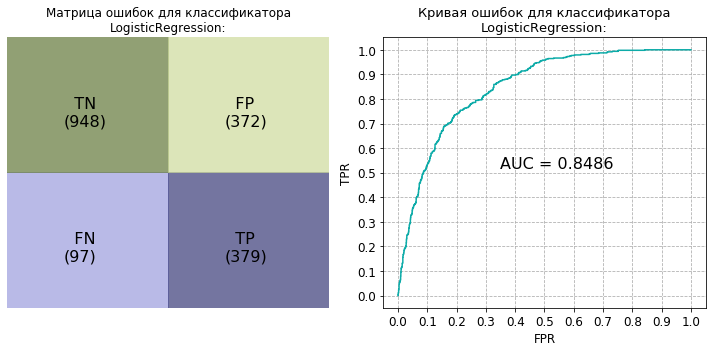

In [40]:
lr_params = {'C': np.arange(0.1, 2, 0.1)}

lr_model = GridSearchCV(estimator = init_estimators[7], param_grid = lr_params, cv = skf, error_score = 'roc_auc').fit(X_train4, y_train)
pred = lr_model.predict(X_test4)
print(f'Подобранные на кросс-валидации гиперпараметры для алгоритма {estimator_names[7]}\n{lr_model.best_params_}\n\n')
print(f'Основыне метрики качества классификации алгоритмом {estimator_names[7]}:\n{classification_report(y_test, pred)}')
reports_dict[estimator_names[7]] = classification_report(y_test, pred, output_dict = True)
pproba = lr_model.predict_proba(X_test4)[:,1]
roc_auc_dict[estimator_names[7]] = roc_auc_score(y_test, pproba) 
make_graphs(estimator_names[7],  y_test, pred, pproba)          

***Стекинг***<br>
В заключение посмотрим, удастся ли улучшить результаты классификации с помощью применения алгоритма стекинга.

In [41]:
def stacking(models, meta_alg, data_train, targets_train, data_test, cv=5):  #Функция, осуществляющая стекинг
    
    
  
    meta_mtrx = np.empty((data_train.shape[0], len(models)))
    for n, model in enumerate(models):
        meta_mtrx[:, n] = cross_val_predict(model, data_train, targets_train, cv=cv, method='predict')
        model.fit(data_train, targets_train)
           
        
    meta_model = meta_alg.fit(meta_mtrx, targets_train)
        
    meta_mtrx_test = np.empty((data_test.shape[0], len(models)))
        
    for n, model in enumerate(models):
        meta_mtrx_test[:, n] = model.predict(data_test)
        
    meta_predicted = meta_model.predict(meta_mtrx_test)
    meta_predicted_proba = meta_model.predict_proba(meta_mtrx_test)[:,1]
    
     
        
    return (meta_predicted, meta_predicted_proba)

In [42]:
#В качестве базовых алгоритмов выбираем  SVC, DecisionTreeClassifier, XGBClassifier, RandomForestClassifier
#с подобранными ранее оптимальными параметрами (best_estimator_)
best_models = [svc_model.best_estimator_, dtc_model.best_estimator_, xgb_model.best_estimator_, rfc_model.best_estimator_]
#В качестве мета-алгоритма выбираем логистическую регрессию
meta_alg = lr_model.best_estimator_

pred, pproba = stacking(models = best_models, meta_alg = meta_alg,\
              data_train = X_train, targets_train = y_train, data_test=X_test, cv = skf)

Основыне метрики качества классификации алгоритмом Stacking:
              precision    recall  f1-score   support

           0       0.91      0.77      0.83      1320
           1       0.55      0.80      0.65       476

    accuracy                           0.78      1796
   macro avg       0.73      0.78      0.74      1796
weighted avg       0.82      0.78      0.79      1796



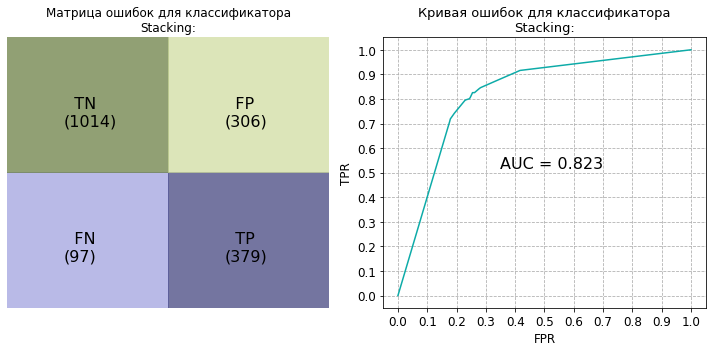

In [43]:
print(f'Основыне метрики качества классификации алгоритмом {estimator_names[8]}:\n{classification_report(y_test, pred)}')
reports_dict[estimator_names[8]] = classification_report(y_test, pred, output_dict = True)
roc_auc_dict[estimator_names[8]] = roc_auc_score(y_test, pproba) 
make_graphs(estimator_names[8],  y_test, pred, pproba)          

Видим, что в данном случае применение алгоритма стекинга не оправдано: он дает худшие результаты, чем почти все использованные алгоритмы, кроме KNeighborsClassifier.

# 4. Сравнение качества моделей 

Сформируем датафрейм models_desc из ранее созданных словарей reports_dict и roc_auc_dict для сравнения качества исследованных моделей:

In [50]:
cols = pd.MultiIndex.from_product([['0', '1'], ['precision', 'recall', 'f1-score']])
models_desc = pd.DataFrame([], columns = cols, index = estimator_names)
models_desc['accuracy'] = np.empty([9,1])
models_desc['roc_auc'] = np.empty([9,1])

for name in estimator_names:
    for key in reports_dict[name].keys():
        if key == 'accuracy':
            models_desc.loc[name, (key, '')] = reports_dict[name][key]
        elif key in ['0', '1']:
            for metric in reports_dict[name][key].keys():
                models_desc.loc[name, (key, metric)] = reports_dict[name][key][metric]
    models_desc.loc[name, ('roc_auc', '')] = roc_auc_dict[name]
    models_desc.drop(columns = [('0', 'support'), ('1', 'support')], inplace = True)
print('Таблица сравнения метрик качества классификаторов:\n')            
models_desc

Таблица сравнения метрик качества классификаторов:



0                             1            \
                       precision    recall  f1-score precision    recall   
DecisionTreeClassifier  0.896705  0.762879  0.824396  0.534918  0.756303   
GaussianNB              0.898242  0.735606   0.80883  0.511888  0.768908   
KNeighborsClassifier    0.806452   0.92803   0.86298   0.65704  0.382353   
SVC(kernel = 'rbf')     0.916174  0.703788  0.796058       0.5  0.821429   
SVC(kernel = 'linear')  0.916091   0.70303  0.795542  0.499361  0.821429   
XGBClassifier               0.92  0.749242  0.825887  0.540915  0.819328   
RandomForestClassifier  0.898964  0.788636  0.840194  0.562696  0.754202   
LogisticRegression      0.907177  0.718182  0.801691   0.50466  0.796218   
Stacking                0.912691  0.768182  0.834225  0.553285  0.796218   

                                  accuracy   roc_auc  
                        f1-score                      
DecisionTreeClassifier  0.626632  0.761136  0.827527  
GaussianNB               0.61461  0.744432  0.830960  
KNeighborsClassifier      0.4834  0.783408  0.804117  
SVC(kernel = 'rbf')     0.621622  0.734967  0.841094  
SVC(kernel = 'linear')  0.621128  0.734410  0.850677  
XGBClassifier           0.651629  0.767817  0.855429  
RandomForestClassifier  0.644524  0.779510  0.849846  
LogisticRegression      0.617767  0.738864  0.848557  
Stacking                0.652885  0.775612  0.823042

В таблице выше класс 0 - это Not Churn (пользователи, для которых не произошло оттока), класс 1 - Churn (пользователи, у которых произошел отток. Наилучшие показатели по roc-auc меют классификаторы XGBClassifier и SVC с вычислительным ядром "linear". Самые плохие показатели у классификатора KNeighborsClassifier, особенно по важнейшему для этой задачи показателю recall в классе 1 (составляет всего 0.383). Показатель recall в классе 1 имеет первостепенное значение, поскольку мы стремимся пропустить (неверно классифицировать) как можно меньше клиентов, у которых произошел отток, т.е. снижать FalseNegative. Классификатор GaussianNB, так же, как и KNeighborsClassifier, является достаточно простым по своему внутреннему устройству в сравнении с другими классификаторами, использованными в рамках данной работы, но дает гораздо лучший результат, чем KNeighborsClassifier. В целом, по итогу выбирать следует либо XGBClassifier (показал максимальный roc_auc среди всех моделей), либо SVC с вычислительным ядром "linear" (показал минимальный FalseNegative среди всех моделей).<br><br>

В данной курсовой работе был подробно проанализирован датасет с данными о клиентах телекоммуникационной компании, сформулированы гипотезы, с использованием которых были построены модели машинного обучения для прогнозирования вероятности оттока клиентов. Лучшими моделями классификации оказались XGBClassifier и SVC с вычислительным ядром "linear". Различия в качестве между ними крайне незначительны, для получения достаточно точных результатов предсказаний можно пользоваться любой из этих двух моделей.